In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import json
from pathlib import Path

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
#アノテーションjsonの読み込み
with open("/content/drive/MyDrive/止まれセグメンテーション/dataset/"
          "annotation/vott-json-export/止まれアノテーション-export.json") as f:
    annotation = json.load(f)

#マスク画像の保存用フォルダのpath
mask_dir = "/content/drive/MyDrive/止まれセグメンテーション/dataset/mask"
os.makedirs(mask_dir, exist_ok=True)

#アノテーションを順番に読み込みマスク画像を生成、保存する
for k, v in annotation["assets"].items():
    #元画像と同じサイズのマスクを作成
    mask = np.zeros((v["asset"]["size"]["height"], v["asset"]["size"]["width"], 3))
    img_name = Path(v["asset"]["name"]).stem
    #アノテーション領域を順に読み出し
    for r in v["regions"]:
        point_list = [[round(p["x"]), round(p["y"])] for p in r["points"]]
        point_list = np.array(point_list).reshape(1, -1, 2)
        #ポリゴンの点から領域を描画
        cv2.fillPoly(mask, point_list, color=(255, 0, 0))
    cv2.imwrite(f"{mask_dir}/{img_name}.png", mask[..., 0].astype(np.uint8))


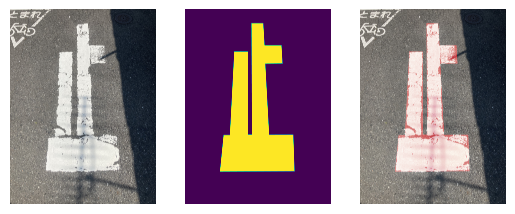

In [5]:
#正しく生成できているかチェック

plt.subplot(131)
plt.axis("off")
img = cv2.imread("/content/drive/MyDrive/止まれセグメンテーション/dataset/image/001_0.jpg")[..., [2,1,0]]
plt.imshow(img)

plt.subplot(132)
plt.axis("off")
mask = cv2.imread(f"{mask_dir}/001_0.png", 0)
plt.imshow(mask)

plt.subplot(133)
plt.axis("off")
img[..., 0] = (img[..., 0] * (mask == 0)) + (img[..., 0] * (mask > 0) * 0.3 + mask * 0.7).astype(np.uint8)
plt.imshow(img)